<h2 style='color:purple' align='center'>Face Mask Detection</h2>

### 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import os
from pathlib import Path 
from keras.preprocessing import image # only for reading image
import matplotlib.pyplot as plt

Using TensorFlow backend.


<br>

### 2. Importing Dataset

In [2]:
image_data = []
labels = []

p = Path("./Dataset/with mask")
dirs = p.glob("*")
imagecount = 0

for img_path in dirs:
    
    img = image.load_img(img_path, target_size=(100, 100))
    img_array = image.img_to_array(img)
        
    image_data.append(img_array)
    labels.append(1)

    imagecount += 1
        
print(imagecount)
        

690


In [3]:
p = Path("./Dataset/without mask")
dirs = p.glob("*")

for img_path in dirs:
    
    img = image.load_img(img_path, target_size=(100, 100))
    img_array = image.img_to_array(img)
        
    image_data.append(img_array)
    labels.append(0)

    imagecount += 1
        
print(imagecount)


1376


In [4]:
X = np.array(image_data)

In [5]:
y = np.array(labels)

<br>

### 3. Exploring Dataset

In [6]:
# Draw some Images 
def drawImage(img, label):
    plt.title(label)
    plt.imshow(img)
    plt.show()

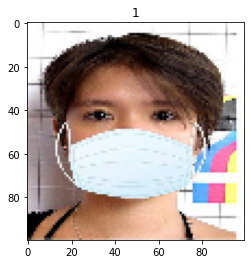

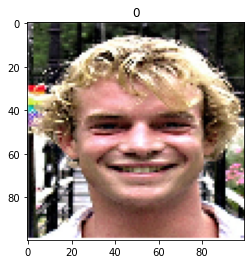

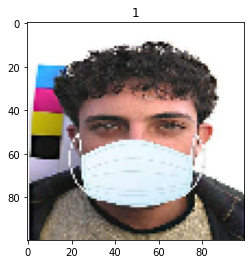

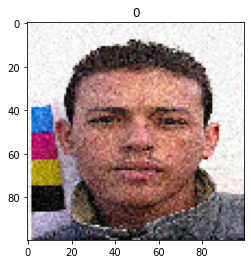

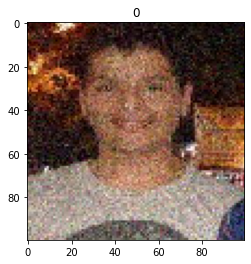

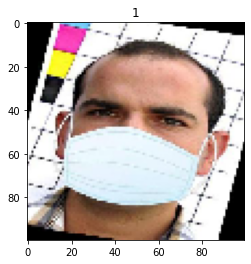

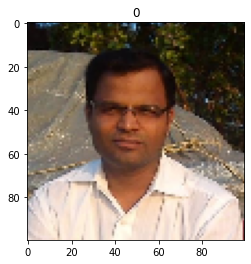

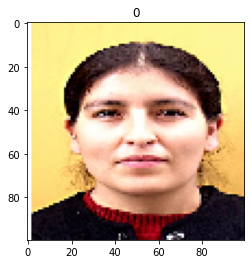

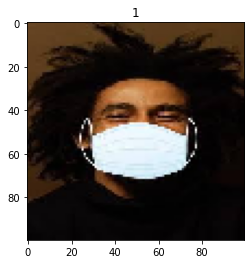

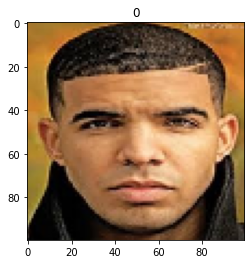

In [7]:
for i in range(10):
    rand_index = np.random.randint(1376)
    drawImage(X[rand_index]/255.0, y[rand_index])

<br>

### 4. Normalizing Dataset

In [8]:
flatten_X = []

for current_image in X:
    flatten_X.append(current_image.flatten())

In [9]:
X = np.array(flatten_X)
X

array([[ 49.,  58.,  31., ...,  21.,  12.,  13.],
       [250., 250., 248., ...,  22.,  22.,  20.],
       [222., 224., 223., ...,  21.,  26.,  30.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [234., 235., 239., ..., 205., 204., 222.],
       [241., 237., 236., ..., 207., 231., 231.]], dtype=float32)

In [10]:
from sklearn import preprocessing
X = preprocessing.normalize(X)
X

array([[0.00338592, 0.00400783, 0.00214211, ..., 0.00145111, 0.00082921,
        0.00089831],
       [0.00693874, 0.00693874, 0.00688323, ..., 0.00061061, 0.00061061,
        0.0005551 ],
       [0.00743749, 0.0075045 , 0.007471  , ..., 0.00070355, 0.00087106,
        0.00100507],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.0070781 , 0.00710835, 0.00722934, ..., 0.0062009 , 0.00617065,
        0.00671512],
       [0.00727978, 0.00715896, 0.00712875, ..., 0.00625276, 0.00697772,
        0.00697772]], dtype=float32)

<br>

### 5. Dividing dataset into Training and Test set

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [13]:
print(X_train.shape, y_train.shape)

(963, 30000) (963,)


In [14]:
print(X_test.shape, y_test.shape)

(413, 30000) (413,)


<br>

### 6. Model Training

In [15]:
from sklearn.neighbors import KNeighborsClassifier 

In [16]:
knn = KNeighborsClassifier(n_neighbors=10) 
  
knn.fit(X_train, y_train) 
  
# Predict on dataset which model has not seen before 
# print(knn.predict(X_test)) 

print(knn.score(X_test, y_test))

0.837772397094431


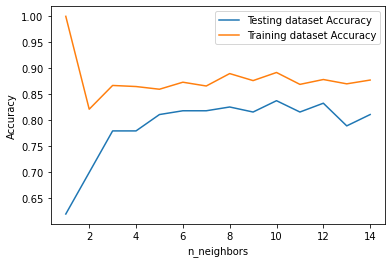

In [17]:
neighbors = np.arange(1, 15) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 
  
# Loop over K values 
for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train) 
      
    # Compute traning and test data accuracy 
    train_accuracy[i] = knn.score(X_train, y_train) 
    test_accuracy[i] = knn.score(X_test, y_test) 
  
# Generate plot 
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 
  
plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.show() 